# Predicting Diabetes Based on Diagnostic Measurements
**Presented by:**
S12 - Group 7
- Bacierto, Marcky
- Baliog, Miguel
- Capulong, Chanel
- Saril, Diabetes
- Tan, Xavier

## Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases and was taken from a [Kaggle Dataset uploaded by MEHMET AKTURK in 2020](https://www.kaggle.com/datasets/mathchi/diabetes-data-set). The dataset contains a series of features which will be utilized to achieved the objective of predicting whether a patient has diabetes based on their respective diagnostic measurements.

## Content
According to Akturk, there are several constraints placed on the selection of these instances from a larger database. In this particular database, all the patients are females who are at least 21 years old and are of Pima Indian heritage.

## Columns
- **Pregnancies:** Number of times pregnant; Pregnancy can change how a woman's body uses glucose. This can make diabetes worse, or lead to gestational diabetes.
---
- **Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test; Diabetes is a problem with your body that causes blood sugar (also called blood glucose) levels to rise higher than normal. This is also called hyperglycemia. When you eat, your body breaks food down into sugar and sends it into the blood
---
- **BloodPressure:** Diastolic blood pressure (mm Hg); High blood pressure is twice as likely to strike a person with diabetes than a person without diabetes
---
- **SkinThickness:** Triceps skin fold thickness (mm); Skin thickness is primarily determined by collagen content and is increased in insulin-dependent diabetes mellitus (IDDM)
---
- **Insulin:** 2-Hour serum insulin (mu U/ml); Insulin is a key player in developing type 2 diabetes. This vital hormone—you can't survive without it—regulates blood sugar (glucose) in the body, a very complicated process. Here are the high points: The food you eat is broken down into blood sugar.
---
- **BMI:** Body mass index (weight in kg/(height in m)^2); The highest BMI group had a greater likelihood of developing diabetes than all other BMI groups, regardless of genetic risk.
---
- **DiabetesPedigreeFunction:** Diabetes pedigree function; scores the likelihood of diabetes based on family history
---
- **Age:** Age (years); The risk of developing diabetes increases with age. The CDC report that 4.0 percent of people aged 18 to 44 years are living with diabetes, 17 percent of those aged 45 to 64 years, and 25.2 percent of those aged over 65 years.
---
- **Outcome:** Class variable (0 or 1); 0 means no diabetes, while 1 means the occurrence of diabetes

## Sources
- Original owners: 
    National Institute of Diabetes and Digestive and Kidney Diseases
- Donor of database: 
    Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
    Research Center, RMI Group Leader
    Applied Physics Laboratory
    The Johns Hopkins University
    Johns Hopkins Road
    Laurel, MD 20707
    (301) 953-6231
- Date received: 
    9 May 1990

## Importing of Essential Packages

To start off the notebook, we import libraries and functions that we need for our code cells.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#libraries for inferential statistics/EDA
from scipy import stats
import seaborn as sns

## Reading of the Dataset

We load the dataset from the `.csv` file to a `DataFrame`.

In [2]:
df = pd.read_csv('diabetes.csv') # Utilization of pandas to read the dataset
df # Viewing of dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Preliminary Exploratory Data Analysis

First we will be determining how many rows and columns are there in our dataset

In [3]:
df.shape # Identifying the number of rows and columns present in the dataset

(768, 9)

Now we will be determining the data types in each column and if there are nulls

In [4]:
df.info() # Exploring the data types present in each column and if there are nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Afterwards, we will need an overview of the dataset through the utilization of descriptive statistics

In [5]:
df.describe() # Utilization of descriptive statistics to reveal basic information regarding the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Lastly, we need to determine the percentage of data with and without diabetes

The percentage of people with diabetes is: 34.9 %
The percentage of people without diabetes is: 65.1 %


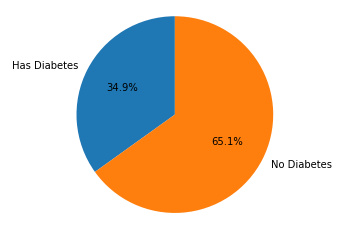

In [6]:
# Determining the percentage of patients with diabetes and those without based on the Outcome column
results = []

for x in df["Outcome"]:
    results.append(x)

print("The percentage of people with diabetes is:",round(results.count(1)/768*100,1),"%")
print("The percentage of people without diabetes is:",round(results.count(0)/768*100,1),"%")

# Visualizing the percentage of patients with diabetes and those without
labels = "Has Diabetes", "No Diabetes"
sizes = [34.9, 65.1]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Intial Observations
- There are a total of 768 rows and 9 columns
- Through the utilization of `df.info()`, it has been identified that the data contains no null values
- Features **Pregnancies**, **Glucose**, **BloodPressure**, **SkinThickness**, **Insulin**, and **BMI** have a min() value of 0
    - Since features **Glucose**, **BloodPressure**, **SkinThickness**, and **BMI** cannot have a min() value of 0, we will have to replace these values with the mean() value of each respective columns
- **DiabetesPedigreeFunction** has values over 1 when in fact it is a determiner if the diabetes is hereditary
- 65.1% of the data indicate that they do not have diabetes while 34.9% indicate that they have diabetes

## Data Cleaning and Pre-processing

Since the features **Glucose**, **BloodPressure**, **SkinThickness**, and **BMI** cannot have a min() value of 0, we will need to determine the respective mean values of each feature from the observations with values greater than 0, which we will be utilizing to replace the rows with 0 values.

In [7]:
# List of variables with rows containing 0 values
str_features = ['Glucose','BloodPressure', 'SkinThickness', 'BMI']

# Initialize 2D array with - values
features_means = [[0]*2 for x in range(4)]

for var in range(4):
    for outcome in range(2):
        # Get the mean of rows with values greater than 0 for each variable
        mean = df[(df['Outcome'] == outcome) & (df[str_features[var]] > 0)][str_features[var]].mean()
        # store the mean
        features_means[var][outcome] = mean

for var in range(4):
    print(f"Means of {str_features[var]}: {features_means[var]}")

Means of Glucose: [110.64386317907444, 142.31954887218046]
Means of BloodPressure: [70.87733887733887, 75.32142857142857]
Means of SkinThickness: [27.235457063711912, 33.0]
Means of BMI: [30.85967413441951, 35.40676691729318]


Now we will be replacing the 0 values with mean values that we acquired in the previous code block

In [8]:
# Replacing the 0 values with the mean value of each respective column and class
for var in range(4):
    for outcome in range(2):
        df.loc[(df['Outcome'] == outcome) & (df[str_features[var]] == 0), 
        str_features[var]] = features_means[var][outcome]

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000
mean,3.845052,121.697358,72.428141,29.247042,79.799479,32.44642,0.471876,33.240885,0.348958
std,3.369578,30.462008,12.106044,8.923908,115.244002,6.87897,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,0.000000,27.50000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,30.500000,32.05000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,33.000000,127.250000,36.60000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.10000,2.420000,81.000000,1.000000


Since the feature **DiabetesPedigreeFunction** is too long to call, we will rename it to DPF to ease the calling process of the feature.

In [9]:
# Renaming of column DiabetesPedigreeFunction into something shorter
df.rename(columns = {'DiabetesPedigreeFunction':'DPF'}, inplace = True) 
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35.0,0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0,26.6,0.351,31,0
2,8,183.0,64.0,33.0,0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180,32.9,0.171,63,0
764,2,122.0,70.0,27.0,0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112,26.2,0.245,30,0
766,1,126.0,60.0,33.0,0,30.1,0.349,47,1


The DPF determines the probability of the diabetes as hereditary. Having said that, the values of DPF can only be between 0 and 1. In the code block below, we have converted all DPF values over 1 to 1.

In [10]:
# Converting of DiabetesPedigreeFunction values over 1 to 1
df["DPF"] = df["DPF"].where(df["DPF"] <= 1, 1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35.0,0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0,26.6,0.351,31,0
2,8,183.0,64.0,33.0,0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168,43.1,1.000,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180,32.9,0.171,63,0
764,2,122.0,70.0,27.0,0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112,26.2,0.245,30,0
766,1,126.0,60.0,33.0,0,30.1,0.349,47,1


# Exploratory Data Analysis

## Finding Outliers

<AxesSubplot:xlabel='BMI', ylabel='Count'>

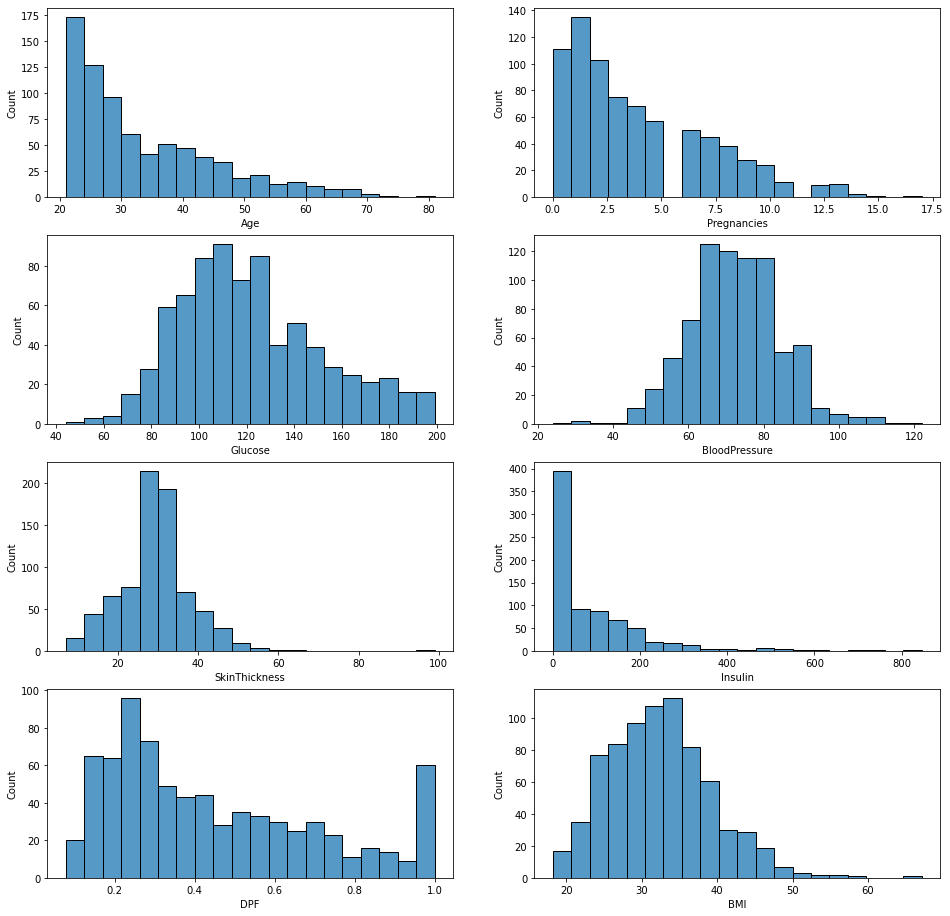

In [11]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.histplot(df.Age, bins = 20, ax=ax[0,0]) 
sns.histplot(df.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.histplot(df.Glucose, bins = 20, ax=ax[1,0]) 
sns.histplot(df.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.histplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.histplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.histplot(df.DPF, bins = 20, ax=ax[3,0]) 
sns.histplot(df.BMI, bins = 20, ax=ax[3,1]) 

As you can see there are outliers shown in the histographs on both sides. However, to make sure, lets find out if the dataset contains 25% and 75% quantiles of outliers.

In [12]:
for feature in df:
    
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DPF no
Age yes
Outcome no


There's a chance these outliers may not be errors but may actually be true outliers, so we are not removing them for now. Let's try to visualize these features with outliers through boxplots.

<AxesSubplot:xlabel='Age'>

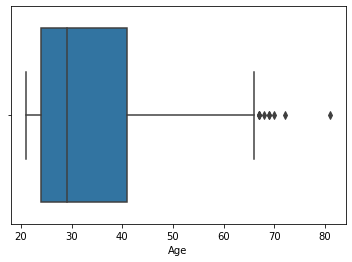

In [13]:
sns.boxplot(x = df.Age)

The Age boxplot shows the outliers skew to the right, meaning older.

<AxesSubplot:xlabel='Pregnancies'>

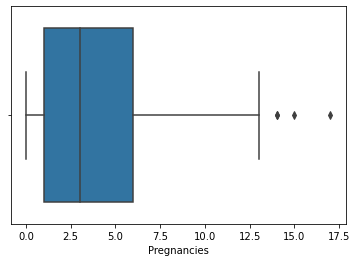

In [14]:
sns.boxplot(x = df.Pregnancies)

The Pregnancies boxplot shows outliers skewing to the right, indicating major outliers of 12+ number of times pregnant.

<AxesSubplot:xlabel='BloodPressure'>

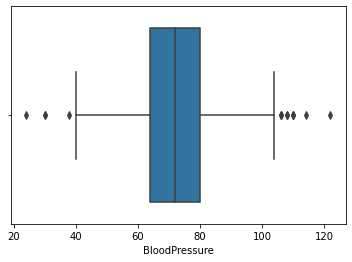

In [15]:
sns.boxplot(x = df.BloodPressure)

The BloodPressure boxplot shows a more balanced distribution of outliers, though more pertaining to the right, indicating higher blood pressure.

<AxesSubplot:xlabel='SkinThickness'>

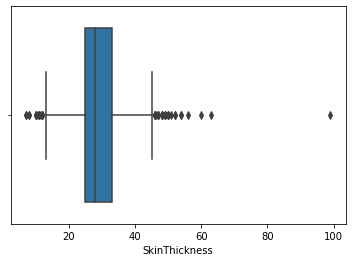

In [16]:
sns.boxplot(x = df.SkinThickness)

The SkinThickness boxplot have outliers on both sides, but an overwhelming amount of outliers skewing to the right.

<AxesSubplot:xlabel='Insulin'>

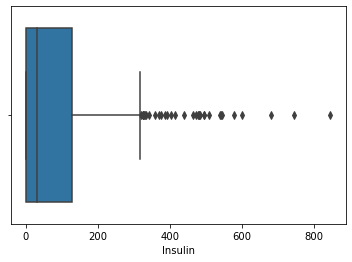

In [17]:
sns.boxplot(x = df.Insulin)

The Insulin boxplot skews to the right, indicating the amount of insulin applied regularly.

<AxesSubplot:xlabel='BMI'>

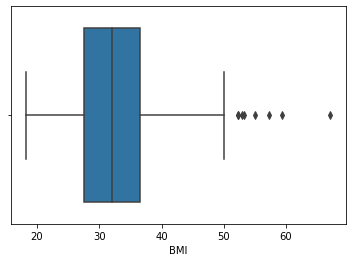

In [18]:
sns.boxplot(x = df.BMI)

The BMI boxplot skews to the right, indicating higher BMI levels.

# Inferential Statistics/Analysis

In this section, we perform inferential statistics or analysis to explain the relationships between the variables and identify their patterns. In the context of the problem, we want to mainly find the differences between non-diabetic and non-diabetic individuals and the relationships of the variables among diabetic people.

We first want to see the average difference of the variables between diabetic and non-diabetic people. To do this, we get the mean value of each variable for each class and store them in a `DataFrame`.

In [19]:
means = []
for col in df.drop(['Outcome'], axis=1).columns:
    temp_df = df[['Outcome', col]]
    
    #get differences in mean
    mean = temp_df.groupby(['Outcome'])[col].mean()
    means.append(mean)

mean_df = pd.DataFrame(data=means, index=df.columns.drop('Outcome'))
print(mean_df)


Outcome                 0           1
Pregnancies      3.298000    4.865672
Glucose        110.643863  142.319549
BloodPressure   70.877339   75.321429
SkinThickness   27.235457   33.000000
Insulin         68.792000  100.335821
BMI             30.859674   35.406767
DPF              0.413376    0.513108
Age             31.190000   37.067164


The table above shows the numerical mean of the variables. We can better represent this by using a bar graph displaying the means by pair for each variable using the dataframe. Additionally, we multiply the Diabetes Pedigree Function variable by 100 to lengthen the bar and to represent the value by its percentage.

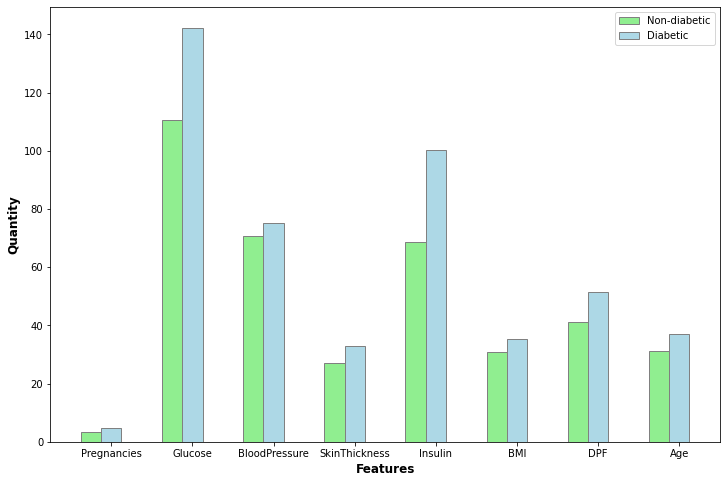

In [20]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
 
# Set position of bar on X axis
br1 = np.arange(len(mean_df[0]))
br2 = [x + barWidth for x in br1]

bar_df = mean_df.copy()

# Multiply DPF by 100 to lengthen bar and to represent by percentage
bar_df.loc['DPF'] = bar_df.loc['DPF'] * 100
 
# Make the plot
plt.bar(br1, bar_df[0], color ='lightgreen', width = barWidth,
        edgecolor ='grey', label ='Non-diabetic')
plt.bar(br2, bar_df[1], color ='lightblue', width = barWidth,
        edgecolor ='grey', label ='Diabetic')

 
# Adding Xticks
plt.xlabel('Features', fontweight ='bold', fontsize = 12)
plt.ylabel('Quantity', fontweight ='bold', fontsize = 12)
plt.xticks([r + barWidth for r in range(len(bar_df[0]))],
        bar_df.index)
 
plt.legend()
plt.show()

As seen in the bar graph above, individuals diagnosed with Diabetes show **higher quantities in all variables**. Interestingly, the biggest differences observed are in both Glucose and Insulin. First, the *glucose variable* has a measurement unit of milligrams per decilitre (mg/dL) and shows us the plasma glucose concentration of the person tested using the oral glucose tolerance test 2 hours after a person, who fasted overnight, has consumed a sugary liquid during examination . *Mayo Clinic* (n.d.) states that a blood sugar or glucose level of less than **140 mg/dL is normal**; a reading of more than **200 mg/dL is considered diabetes** and a reading between **140 and 199 mg/dL** is a sign of **prediabetes**. Looking at the glucose means found in the table before the bar graph, individuals not diagnosed with diabetes had an average of **110.64 mg/dL** which is **normal**, while those **with diabetes** were tested to have an average of **142.32 mg/dL**, which is considered prediabetes. This means that these individuals that showed to have prediabetes in their glucose test were eventually diagnosed with diabetes. This difference in the means shows us that the glucose level could be an effective and reliable predictor of diabetes. On the other hand, the *insulin variable* shows how much insulin is produced **(mu U/ml)** 2 hours after the oral test. Saranya Buppajarntham (2021) stated that a person can produce around **16-166 mu U/ml** worth of insulin 2 hours after the test. The National Institute of Diabetes and Digestive and Kidney Diseases or NIDDK (2018) explains that insulin is not usually tested and is less significant than glucose for diagnosis, but **high insulin levels** can be indicative of prediabetes or insulin resistance, which is a symptom of **Type 2 diabetes** in particular. The institute expounded that insulin resistance happens when organs in the body do not respond well to insulin and cannot consume glucose easily from the blood, causing the pancreas to produce more insulin than normal. This means that alongside high glucose levels, high insulin levels can also be diagnosed as prediabetes. As seen in the **insulin levels of the two classes**, individuals diagnosed with diabetes showed to have an average of **100.34 mu U/ml** insulin levels, significantly higher than the average of **68.8 mu U/ml** for non-diabetic individuals. While this difference does not show that insulin level is not a definitive indicator of diabetes, it may mean a possible occurrence that diabetic individuals experience alongside the high glucose levels that they have.

There are small but still considerable differences in the other variables that we can infer. First, individuals diagnosed with diabetes have a higher but negligible number of pregnancies, but pregnancy can change how a woman's body uses glucose and can further complicate diseases such as diabetes. They also have higher blood pressure and BMI, both of which at higher values cause the individual to have a higher likelihood of developing diabetes. Furthermore, higher skin thickness is increased in insulin-dependent diabetes mellitus (IDDM), while higher Diabetes Pedigree Function values show higher occurence of diabetes in family history and therefore higher likelihood in developing diabetes. Finally, older people are more likely to develop diseases and diabetes is likely one of them because of organ degradation.

Since all these differences are observed in all variables that are known to contribute to the likelihood of diabetes, we can infer that it is not only one variable but a combination of these variables that can likely cause or at least show signs of diabetes.

Despite these observations, we cannot formulate a concrete conclusion about these differences yet because we are not yet sure of the distribution of these values and if these differences are significant and/or an effect of coincidental data or outliers.

We can comprehensively visualize the distribution of all variables using Seaborn's `PairPlot`, which plots pairwise relationships of the variables in the dataset. We simply call the function and set the `Outcome` class as the hue to distinguish the classes. Note that this cell may take some time to run as many plots are being drawn.

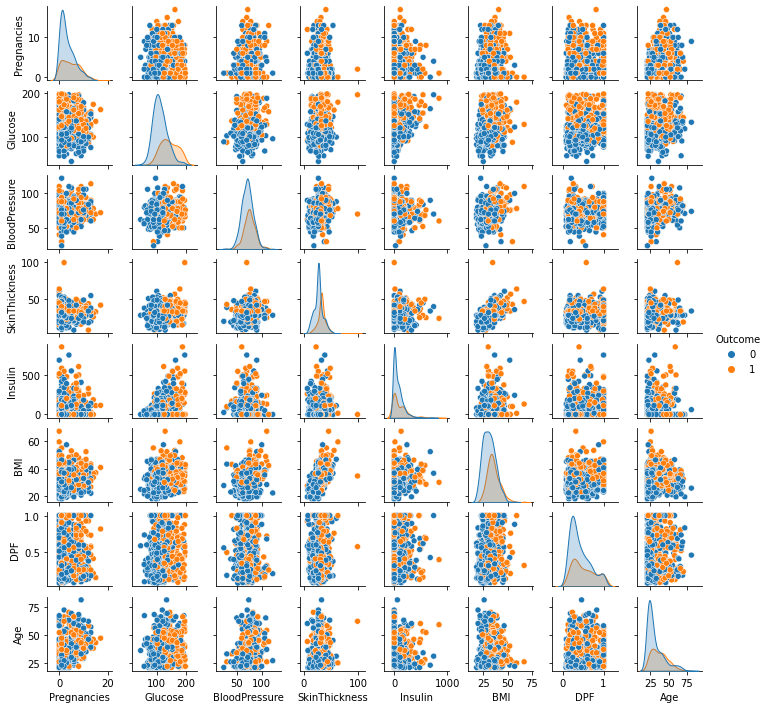

In [21]:
sns.pairplot(df, hue="Outcome", height=1.25)

The grid contains two types of plots,`LinePlot` that is drawn on the diagonal of the grid and `ScatterPlot` that is drawn outside the diagonal. 

The scatterplots show the relationship between the two different variables and their possible patterns or correlations. The plots do not have any pattern and only tell us that the data's variables are disorderly distributed. However, columns where 0 values were replaced with their means, like `Insulin`, are seen to have straight lines of dots because of this preprocessing step.

The lineplots, on the other hand, show the **difference in distribution** between the classes in regards to the same **variable**. As seen in all the graphs, the curves of both classes have the **same shape**, but the curve of the **Non-diabetic** class is **taller** because of the higher sample size of non-diabetic individuals in the dataset. This confirms the concern raised earlier about the two classes **having unequal sample sizes** but the **same distribution shape**.

After data visualization, we can now run a hypothesis test for *each variable* to determine whether the higher means of the diabetic individuals compared to the non-diabetic individuals are significant. These should be our hypotheses:

    1. Null Hypothesis: The mean value of a certain variable for diabetic individuals is not greater than the mean value for non-diabetic individuals
    2. Alternative Hypothesis:  The mean value of a certain variable for diabetic individuals is greater than the mean value for non-diabetic individuals

Because of our observations, we can infer that the hypothesis test that we should run is a **T-test** and its **non-parametric** version, the **Welch's T-test**. This test does not assume that the distributions of the two classes are equal and therefore can show results more accurate and appropriate for our data findings. To do this, we call *SciPy's* `ttest_ind` function and set `equal_var` parameter to `False` and the `alternative` hypothesis parameter to `greater`.


In [22]:
p_vals = []
for col in df.drop(['Outcome'], axis=1).columns:
    temp_df = df[['Outcome', col]]

    #perform welch test since number of diabetic and non-diabetic individuals are not relatively equal
    tstat,pval = stats.ttest_ind(temp_df[temp_df['Outcome'] == 1][col],
                temp_df[temp_df['Outcome'] == 0][col],equal_var=False, alternative='greater')
    p_vals.append(pval)

p_vals_ser = pd.Series(data=p_vals,name="P Values", index=df.columns.drop('Outcome'))
print(p_vals_ser)

Pregnancies      3.410963e-09
Glucose          4.223016e-42
BloodPressure    5.678023e-07
SkinThickness    2.114034e-18
Insulin          5.234643e-04
BMI              5.507418e-19
DPF              5.033872e-07
Age              6.007563e-12
Name: P Values, dtype: float64


As seen in the list above, all the variables' **p-values** are astronomically low which show promise that diabetic individuals indeed have **higher averages** across the board. 

We can use the standard `alpha value` for statistical significance which is `0.05`. We then check which variable `p-values` are smaller and therefore statistically significant.

In [23]:
alpha_value = 0.05
print(f"Alpha value is {alpha_value}")
p_vals_ser.lt(alpha_value)

Alpha value is 0.05


Pregnancies      True
Glucose          True
BloodPressure    True
SkinThickness    True
Insulin          True
BMI              True
DPF              True
Age              True
Name: P Values, dtype: bool

The table above shows that all differences are statistically significant and that we should **reject** the null hypothesis. However, since this is a medical domain and diagnosis is the objective here, we may want to be significantly confident in our findings. Therefore, we can set the `alpha value` much lower to `0.0001`.

In [24]:
alpha_value = 0.0001
print(f"Alpha value is {alpha_value}")
p_vals_ser.lt(alpha_value)

Alpha value is 0.0001


Pregnancies       True
Glucose           True
BloodPressure     True
SkinThickness     True
Insulin          False
BMI               True
DPF               True
Age               True
Name: P Values, dtype: bool

The table above shows that even when the `alpha value` is significantly lower at `0.0001`, we still **reject** the null hypothesis except for the `Insulin` variable where we should **fail to reject** it. Therefore, we should conclude that **all the differences are statistically significant and that diabetic individuals confidently have higher averages in all features than non-diabetic individuals**.

### Correlation Analysis in Variables

Next inferential analysis technique that we will perform is correlation in variables. Finding out correlations in our features will help us predict behavior and improve diagnosis when one correlated variable increases or decreases in value. In particular, we want to find correlation in variables among those **diagnosed with diabetes** to understand their relationships.



To do this, we must first create a `DataFrame` with rows where `Outcome == 1`.

In [25]:
diabetes_df = df[df['Outcome']== 1]

We can then create a correlation matrix by calling pandas's `corr()` function and map it to seaborn's `heatmap` to visualize and determine which variables are correlated.


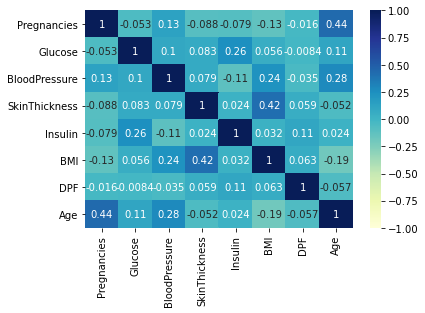

In [26]:
df_corr_heatmap = sns.heatmap(diabetes_df.drop(['Outcome'], axis=1).corr(), 
                                center=0, 
                                cmap="YlGnBu", 
                                annot=True, 
                                vmin=-1, 
                                vmax=1)

As seen in the correlation matrix, correlations among variables are limited and few have barely miss the `0.50` value. This means that many of the variables are **slightly correlated** or **moderately correlated** at best. This observation can be supported by the `scatter plots` in our previous `PairPlot` since the dots show no concrete pattern and are disorderly distributed.

One of the pair of variables with the highest positive correlation is the `SkinThickness` and `BMI`, with a value of `0.42`. We can draw a scatterplot to confirm any patterns or correlation between them.

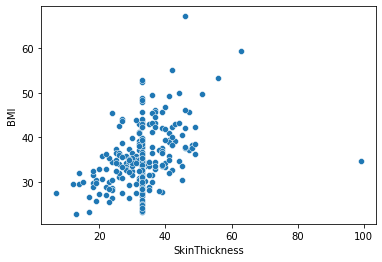

In [27]:
st_bmi_df = diabetes_df[['SkinThickness','BMI']]
st_bmi_scatter = sns.scatterplot(data=st_bmi_df,x='SkinThickness',y='BMI')

As seen in the scatterplot, the dots are clearly scattered but there is a moderate sign or shape of positive relationship between them, in which the `BMI` increases as the `SkinThickness` increases. There is also a straight line of dots which is the result of filling 0 values of the `BMI` with the **average BMI** of diabetic individuals. Regardless, the scatterplot justifies the moderately high `0.42` correlation between the two variables. Jose Derraik et al. (2014) in their study actually found that *skin thickness is strongly associated with BMI* over the entire lifespan and that skin layers became progressively thicker with increasing BMI in both children and adults. This study further supports our observation of positive correlation.



We should compare this observation with a pair of variables whose correlation is near `0`, such as `DPF` and `Glucose` with a correlation value of `-0.0084`.

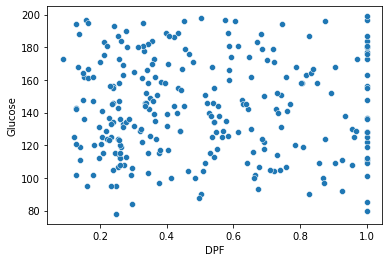

In [28]:
dpf_glu_df = diabetes_df[['DPF','Glucose']]
dpf_glu_scatter = sns.scatterplot(data=dpf_glu_df,x='DPF',y='Glucose')

As seen in the scatter plot above, there is absolutely no correlation between the `Diabetes Pedigree Function` and `Glucose` levels as the dots are scattered over the whole grid with no patterns. The difference between the scatter plots confirms the values that we have observed in the correlation matrix.

# Machine Learning

After exploring and analyzing the dataset, we will implement a machine learning model to learn and perform a task related to our dataset.

Looking at our dataset, the task the model will perform is a **supervised classification** task because we have to classify whether the individuals are diabetic or non-diabetic based on their features, and the outcome is already provided in the datapoints for the model to learn.

For this project, we will implement `LogisticRegression` as it is one of the easiest to implement but is still effective for classification. It uses the input data to predict the probability a person has diabetes. The predicted probability is calculated using a sigmoid function, which maps any input value to a value between 0 and 1. 

Since this classification task only has a total of **2 classes**, the baseline accuracy that we have to surpass is **50%**, which is the probability we can correctly guess whether a person is diabetic.

To start off, we import functions like `LogisticRegression` and `train_test_split` from sklearn.

We then separate the features and the outcome and use them to split our dataset to train dataset receiving **70%** of the dataset for training and test dataset receiving the rest for testing. We will also set the sampling as **stratified** to preserve the distribution of the two classes.

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# get the features
X = df.drop(['Outcome'], axis=1)
# get the outcome
y = df['Outcome']

# Split the dataset to train and test data set using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify = y)

print(f"Shape of train dataset: {X_train.shape}")
print(f"Shape of test dataset: {X_test.shape}")

Shape of train dataset: (537, 8)
Shape of test dataset: (231, 8)


After splitting, we now have **537** datapoints for the train set and **231** for the test set.

After this, we initialize our `LogisticRegression` model by setting our regularization parameter as `L1` as it is stable with datasets containing outliers like ours, and the solver as `liblinear` as it is appropriate for small number of datapoints. We wil lalso set the maximum number of iterations or epochs as **200** and set the `random_state` with an arbitrary number to keep the results consistent.

In [30]:
logReg = LogisticRegression(penalty='l1',solver='liblinear',max_iter=200, random_state=10,verbose=1)

After initializing the model, we then train the model with the train set by calling the `fit()` function.

In [31]:
logReg.fit(X_train, y_train)

[LibLinear]

LogisticRegression(max_iter=200, penalty='l1', random_state=10,
                   solver='liblinear', verbose=1)

As seen in the training run above, the model learned up intil iteration **31** since it cannot improve its learning much further, which is called convergence.

We then check how much it has learned the dataset by predicting on the train dataset through the `predict()` function. We then print its predictions to see if it worked.

In [32]:
predictions = logReg.predict(X_train)
print(predictions)

[1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0
 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0
 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1
 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0
 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0
 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0
 1 1 0 0 0 1 0 0 0 0 0 0 

We can see a list of predictions the model performed. To interprit this, we compare the list to the actual labels of the train dataset and get the sum of the correct predictions and divide it by the number of datapoints to compute for the accuracy.

In [33]:
num_correct = np.sum(predictions == y_train)
accuracy = float(num_correct) / len(y_train)
print(f"Training accuracy: {accuracy * 100:.2f}%")

Training accuracy: 75.42%


We can see that we have achieved an accuracy of **75.42%** which is significantly higher than our baseline accuracy of **50%**. But this accuracy is only on the training dataset it has learned on, so we should also predict this on the test set, which the model has not seen yet.

In [34]:
test_predictions = logReg.predict(X_test)
print(test_predictions)

[1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0
 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 0 0 0 0 0 1]


We also do the same for the test predictions by comparing the list to the actual test labels and compute for the accuracy.

In [35]:
num_correct = np.sum(test_predictions == y_test)
accuracy = float(num_correct) / len(y_test)
print(f"Testing accuracy: {accuracy * 100:.2f}%")

Testing accuracy: 80.95%


We can see that the model actually performed better on the test dataset, yielding a substantially high accuracy of **80.95%**. The difference between the training accuracy and test accuracy is possibly caused by a lot of factors such as ineffective hyperparameter values, for example, but in our case, the gap is caused by the inequal ratio of the datapoints both sets received. But it is necessary that we give majority of the dataset to the train since the model has to intensively learn the datapoints before it can accurately predict their classes.

Both accuracies exceeded the baseline accuracy but accuracy, however, is not comprehensive enough as a metric to evaluate the performance of the model. Therefore, we then build a confusion matrix to not only identify the correct predictions but also identify the number of **false positives** and **false negatives** the model predicted. 

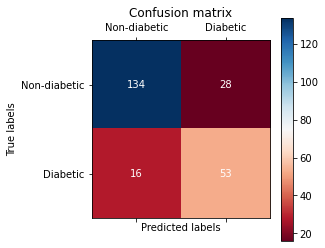

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, test_predictions)

plt.matshow(cm, cmap='RdBu')

ticks =[0,1]
outcomes_str= ["Non-diabetic", "Diabetic"]

for (x, y), value in np.ndenumerate(cm):    
    plt.text(x, y, f"{value:.0f}", va="center", ha="center", color='white')

plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.xticks(ticks, outcomes_str)
plt.yticks(ticks, outcomes_str)
plt.show()

The confusion matrix shows us 4 values in relation to the predicted labels and the true labels of the data. **134**, also known as the true-negative, is the number in which the model correctly predicted individuals as non-diabetic. **28**, also known as false-positive, is the number of non-diabetic individuals incorrectly predicted as diabetic. **16**, also known as false-negative, is the number of diabetic individuals incorrectly predicted as non-diabetic. Last, **53**, also known as true-positive, is the number of individuals correctly predicted as diabetic.

In summary, the matrix tells us that the model correctly predicted majority of the test dataset's classes but it also has a fair share of incorrect predictions. However, the relevance of this matrix is that we should know how the model performed when predicting individuals with diabetes in particular and giving less importance to its predictions on non-diabetic individuals, which is why we want to use other metrics such as recall, precision, and F1-score.

From the confusion matrix we can also compute for the precision, recall, and f1-score.

Precision tells us how much of the model's predictions on the diabetes class are correct and is calculated by dividing the true positives by anything that was predicted as a positive. 

Recall tells us how much of the diabetic individuals are correctly predicted by the model and is calculated by dividing the true positives by anything that should have been predicted as positive.

The F1 score is the harmonic mean of precision and recall. It is a better measure of the performance of a classification model than accuracy  when the classes in the dataset are imbalanced like our dataset's classes.


In [37]:
# True negatives = 153 [0][0]
# False positives = 28 [1][0]
# False negatives = 16 [0][1]
# True positives = 53 [1][1]

precision = cm[1][1] / (cm[1][1] + cm[1][0])
recall = cm[1][1] / (cm[1][1] + cm[0][1]) 
f1= (2 * precision * recall)/(precision + recall) 

print(f"Precision: {(precision *100):.2f}%")
print(f"Recall: {(recall * 100):.2f}%")
print(f"F1-Score: {(f1 * 100):.2f}%")

Precision: 65.43%
Recall: 76.81%
F1-Score: 70.67%


As seen in the computations, the model has a low precision of **65.43%** which means that when the model predicts an individual has diabetes, it has this much chance of being correct. On the other hand, it has a relatively higher recall of **76.81%** which means that the model has correctly predicted this much percentage of diabetic individuals in the test dataset. Finally, the model has F1-score of **70.67%**, substantially lower than our computed accuracy, which tells us a clearer picture that the model correctly diagnoses individuals as diabetic only in moderation compared to what we expected in the accuracy computed earlier.

## Insights and Conclusion

- Glucose levels could be an effective and reliable predictor of diabetes as shown through the means presented.

- As seen in this EDA, one variable cannot be solely the indicator for likelihood of Diabetes, it is seen that a combination of different variables will lead to a more accurate conclusion.

- The Welch's T-test was really useful in this exercise because it did not assume that the distributions of the two classes are equal and therefore showed more accurate results.

- Concepts gleamed from the course are indeed helpful for interpreting data sets at hand. 

- EDA is truly valuable in the medical field, and any other field for that matter.

- We were able to identify trends and patterns successfully with the given data set. 

- Outliers were successfully identified and this has helped us make a better sense of the data set moving forward.

- Our group was able to better understand the relationship between the different variables encountered. 



## References

Buppajarntham, S. (2021). *Insulin*. https://emedicine.medscape.com/article/2089224-overview

Derraik, J. G., Rademaker, M., Cutfield, W. S., Pinto, T. E., Tregurtha, S., Faherty, A., Peart, J. M., Drury, P. L., & Hofman, P. L. (2014). Effects of age, gender, BMI, and anatomical site on skin thickness in children and adults with diabetes. PloS one, 9(1), e86637. https://doi.org/10.1371/journal.pone.0086637

Mayo Clinic. (n.d.). *Diabetes*. Retrieved Dec 15, 2022 from
https://www.mayoclinic.org/diseases-conditions/diabetes/diagnosis-treatment/drc-20371451

National Institute of Diabetes and Digestive and Kidney Diseases. (2018). *Insulin resistance & prediabetes*.
https://www.niddk.nih.gov/health-information/diabetes/overview/what-is-diabetes/prediabetes-insulin-resistance

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=809159a2-439f-4349-8169-729b3da75354' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>